# Pymaceuticals Inc.
---

### Analysis

- Capomulin has shown to be one of the overal best treatment over the course of 45 days.
By evaluating 248 mice we were able to conclude the following.
Capomulin had the loweest over range of tumor volume second to Ramicane.
The sex of the mice did not have an impact on the trial.
The tumor volume of mice treated with Capomulin showed a significant decrease in overall tumor volume in the trial. 
The correlation between mouse weight and the average tumor volume is 0.84, which concludes the more the mouse weighed the higher the tumor volume would be.
Overall, Capomulin and Ramicane showed the best results.

 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")


# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = study_results[study_results["Mouse ID"].isin(dup_mice_id)==False]
clean_df = merge_df[merge_df["Mouse ID"].isin(dup_mice_id)==False]

clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = clean_df["Mouse ID"].nunique()
clean_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,
                                   "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":standard_deviation,
                                   "Tumor Volume Std. Err.":sem})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].aggregate(["mean","median","var","std","sem"])
advanced_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

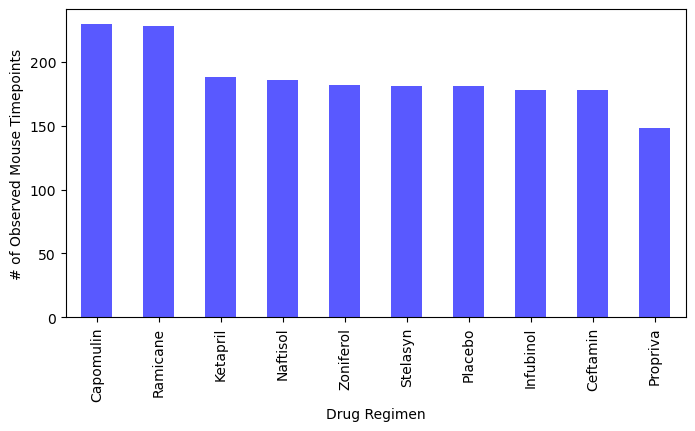

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugregimen_pandas = clean_df["Drug Regimen"].value_counts()
drugregimen_pandas.plot(kind="bar", color="blue",alpha=.65,figsize=(8,4))

plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

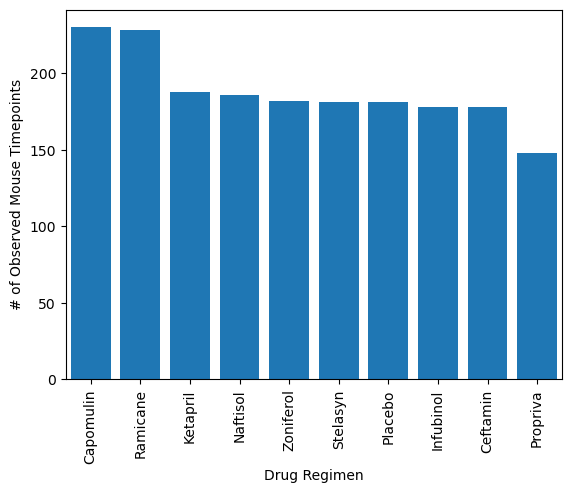

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis.index.values,x_axis.values)
x_axis.plot(kind= "bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

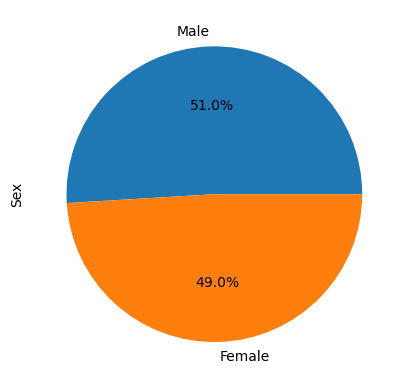

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_mf = clean_df["Sex"].value_counts()
#plt.pie(pie_mf,labels=["Male","Female"],autopct="%1.1f%%")
pie_mf.plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

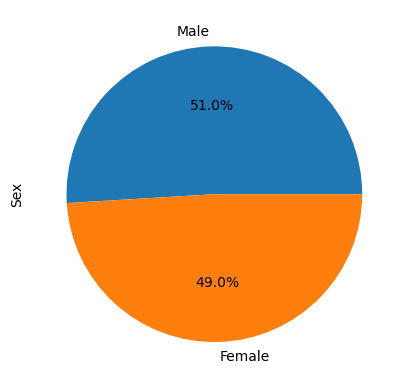

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count = clean_df["Sex"].value_counts()
labels = sex_count.index

sizes = sex_count

plt.ylabel("Sex")
plt.pie(sizes, labels=labels,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastgreatest = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Ramicane_lastgreatest = clean_df.groupby("Mouse ID")["Timepoint"].max()
# Infubinol_lastgreatest = clean_df.groupby("Mouse ID")["Timepoint"].max()
# Ceftamin_lastgreatest = clean_df.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_df = pd.merge(lastgreatest,clean_df,how="left",on=["Mouse ID","Timepoint"])

timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumorvol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list :
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors=timepoint_df.loc[timepoint_df["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumorvol_list.append(tumors)
    
    # Determine outliers using upper and lower bounds
    q1 = tumors.quantile(0.25)
    q3 = tumors.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = tumors.loc[(tumors < fence_low) | (tumors > fence_high)]
    print(treatment,df_out)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


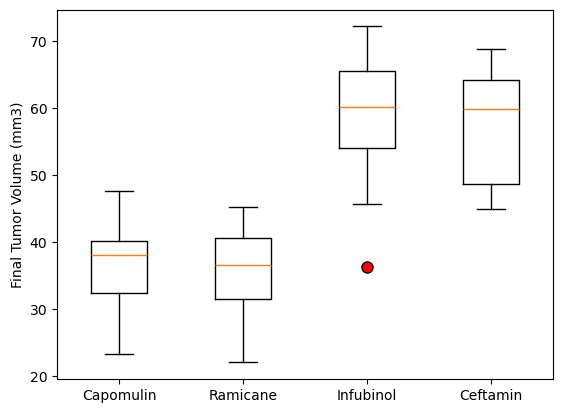

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumorvol_list, labels=treatments_list, flierprops=dict(marker="o",markerfacecolor="red",markersize=8,linestyle="none"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

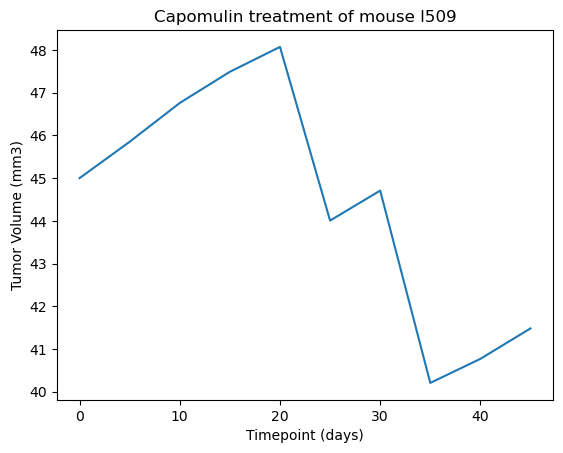

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


selectl509 = clean_df[clean_df["Mouse ID"]=="l509"]

plt.plot(selectl509["Timepoint"],selectl509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


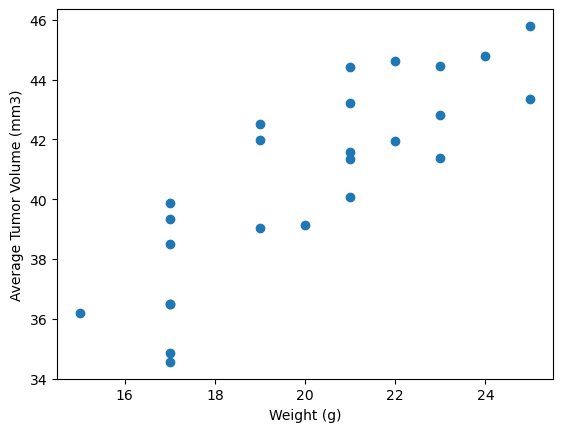

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"]=="Capomulin"]
avg_tumorvol = capomulin_data.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.scatter(avg_tumorvol["Weight (g)"],avg_tumorvol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volumw is 0.84


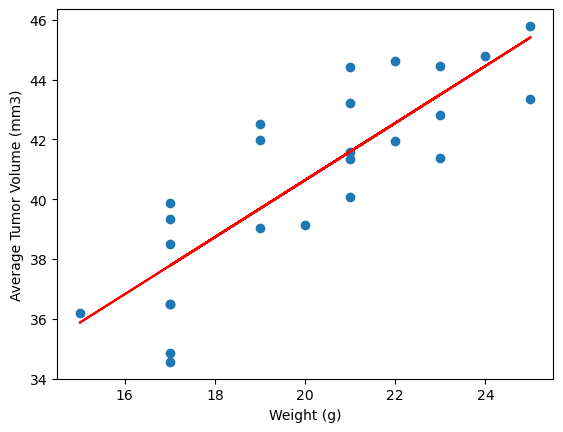

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation= st.pearsonr(avg_tumorvol["Weight (g)"],avg_tumorvol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volumw is {round(correlation[0],2)}")

(slope,intercept,rvalue,pvalue,stderr) = linregress(avg_tumorvol["Weight (g)"],avg_tumorvol["Tumor Volume (mm3)"])
regress_values=avg_tumorvol["Weight (g)"]* slope + intercept
line_eq=f"y= {round(slope,2)} x + {round(intercept,2)}"


plt.scatter(avg_tumorvol["Weight (g)"], avg_tumorvol["Tumor Volume (mm3)"])
plt.plot(avg_tumorvol["Weight (g)"], regress_values, color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()